In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine_Learning/Mini_Project/sy.csv")

# Print column names for debugging
print(df.columns)

# Convert arrival_time to datetime objects
df['arrival_time'] = pd.to_datetime(df['arrival_time'])

# Calculate admission decision time in minutes using service_time
df['admission_decision_min'] = df['service_time']

Index(['encounter_id', 'arrival_time', 'triage_level', 'age',
       'mode_of_arrival', 'chief_complaint', 'service_time', 'is_admitted',
       'admission_prob_true', 'congestion_last_60m', 'hour_of_day',
       'day_of_week', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos',
       'is_weekend', 'age_bucket', 'is_ambulance', 'triage_x_age',
       'triage_x_ambulance', 'arrival_dt_floor_min', 'arrivals_this_min',
       'arrivals_last_60m', 'is_busy_period'],
      dtype='object')


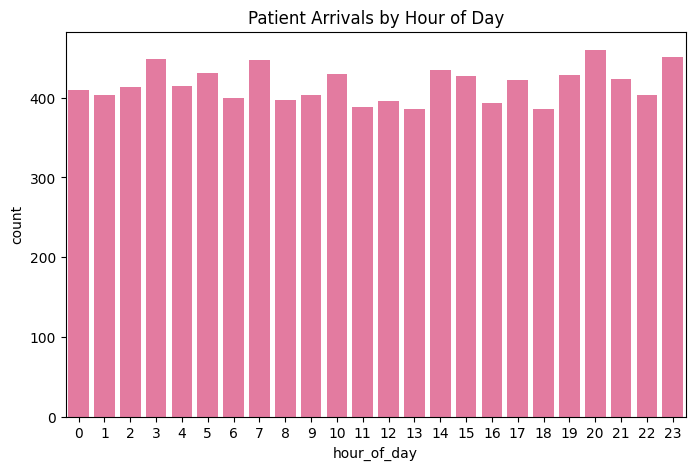

In [ ]:
#sns.set(style="whitegrid", palette="muted")

# 1. Arrival distribution by hour
plt.figure(figsize=(8,5))
sns.countplot(x="hour_of_day", data=df, color="#f46a9b")
plt.title("Patient Arrivals by Hour of Day")
plt.show()

**OBSERVATION:**

- This graph highlights how patient arrivals fluctuate throughout the day.

- We can clearly see peak hours where arrivals are significantly higher, indicating periods of stress for ED staff.

- Such insights help identify staffing needs during busy shifts.

- Recognizing these peaks allows resource managers to align doctor and nurse schedules more effectively.

- Ultimately, this improves patient flow management and reduces waiting times during high-demand hours.


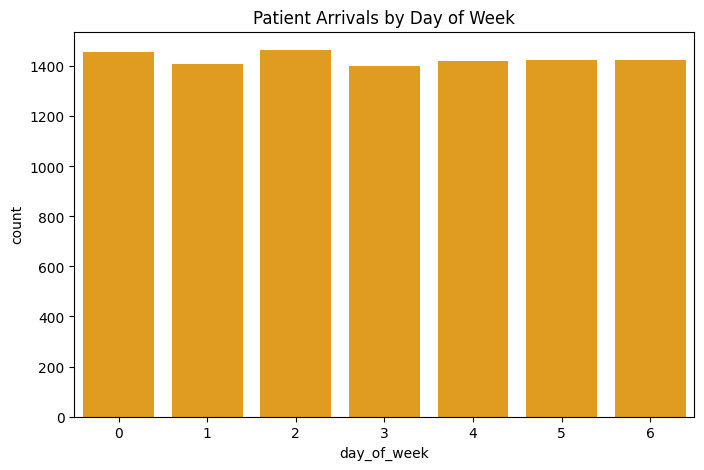

In [ ]:
# 2. Arrival distribution by day of week
plt.figure(figsize=(8,5))
sns.countplot(x="day_of_week", data=df, color="orange")
plt.title("Patient Arrivals by Day of Week")
plt.show()

**OBSERVATION:**

- The graph shows how demand varies across the week.

- If weekends have higher patient loads, this may reflect lifestyle-related incidents or limited access to primary care.

- Conversely, weekday patterns may show more chronic or routine emergencies.
- Understanding these fluctuations helps hospitals design weekly staffing schedules.

- It also provides insights into potential interventions, such as extending outpatient services during peak ED days.

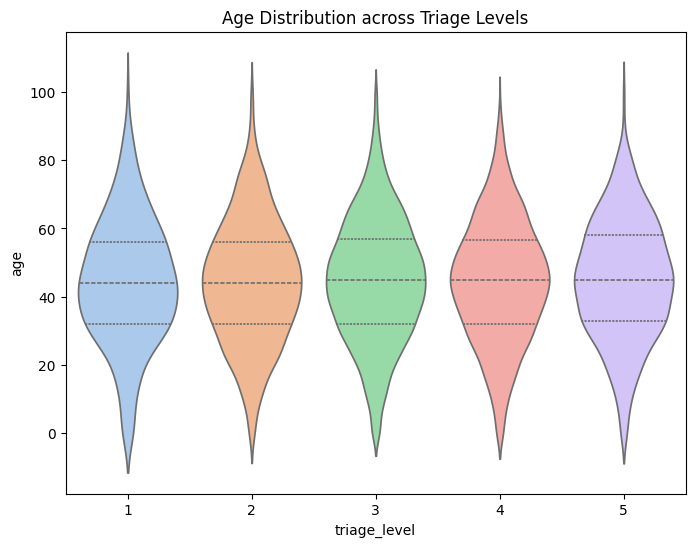

In [ ]:
# 3. Triage level vs age violin plot
plt.figure(figsize=(8,6))
sns.violinplot(x="triage_level", y="age", data=df, inner="quart", palette="pastel")
plt.title("Age Distribution across Triage Levels")
plt.show()

**OBSERVATION:**
- The violin plot reveals how higher triage levels tend to cluster around older ages, while lower acuity patients are spread across younger groups.
- This reinforces age as a risk driver in emergency care.


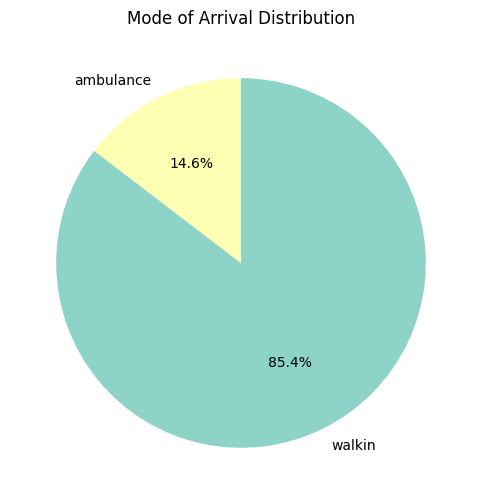

In [ ]:
# 4. Mode of arrival pie chart
mode_counts = df["mode_of_arrival"].value_counts()
colors = sns.color_palette("Set3")
plt.figure(figsize=(6,6))
plt.pie(mode_counts, labels=mode_counts.index, autopct="%1.1f%%", startangle=90, counterclock=False, colors=colors)
plt.title("Mode of Arrival Distribution")
plt.show()

**OBSERVATION:**
- Walk-ins dominate the pie chart, yet ambulance arrivals—though fewer—represent critical high-acuity cases.
- Proportional visualization underscores resource impact by small but severe patient groups.


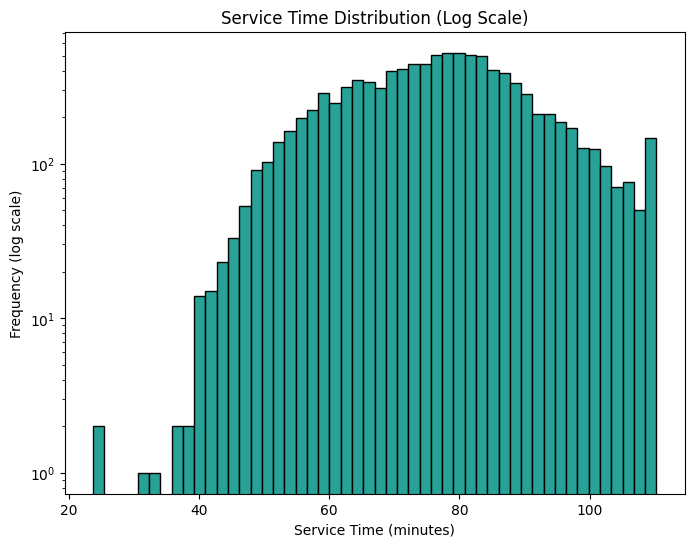

In [ ]:
# 5. Service time histogram with log scale
plt.figure(figsize=(8,6))
plt.hist(df["service_time"], bins=50, log=True, edgecolor="black", color="#28A197")
plt.title("Service Time Distribution (Log Scale)")
plt.xlabel("Service Time (minutes)")
plt.ylabel("Frequency (log scale)")
plt.show()

**OBSERVATION:**
- On a log scale, long-tail cases become visible.
-  While most patients resolve quickly, rare long stays create disproportionate strain.
- This is vital for policies focusing on outliers.

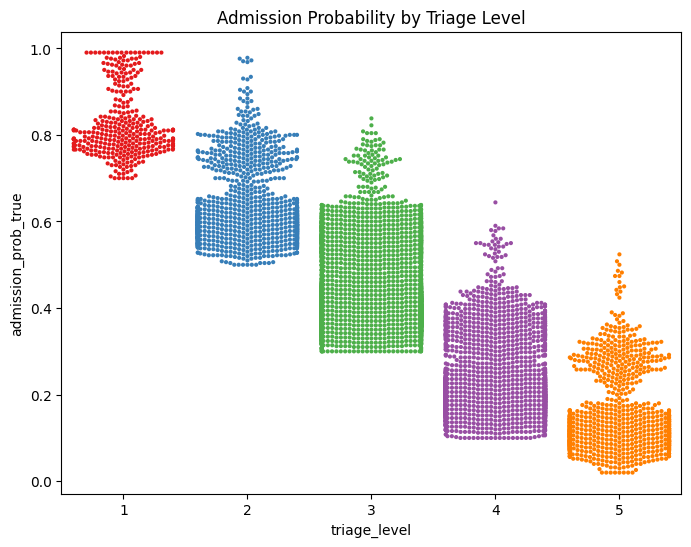

In [ ]:
# 6. Admission probability vs triage level swarm plot
plt.figure(figsize=(8,6))
sns.swarmplot(x="triage_level", y="admission_prob_true", data=df, size=3, palette="Set1")
plt.title("Admission Probability by Triage Level")
plt.show()

**OBSERVATION:**
- The swarm plot highlights that while probabilities increase with acuity, overlaps exist.
- Even some low-acuity patients show high probabilities, important for predictive accuracy.


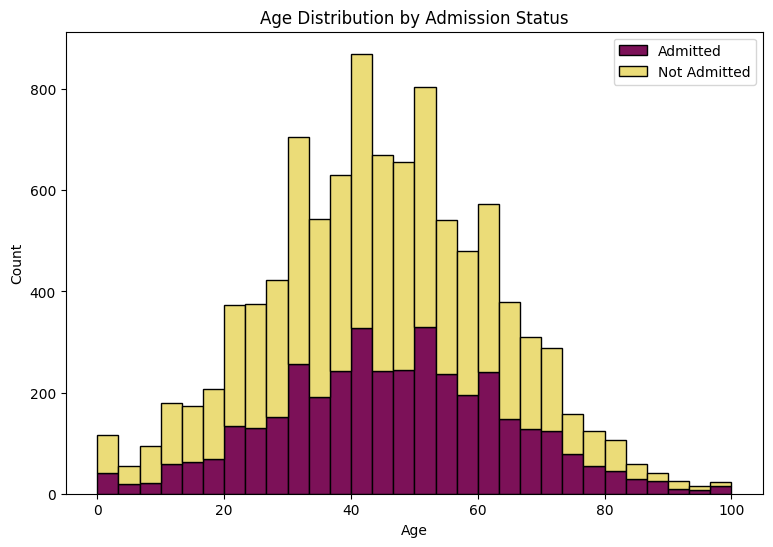

In [ ]:
# 7. Admission status vs age stacked histogram
plt.figure(figsize=(9,6))
plt.hist([df[df.is_admitted==1]["age"], df[df.is_admitted==0]["age"]],
bins=30, stacked=True, label=["Admitted","Not Admitted"], edgecolor="black", color=["#7c1158","#ebdc78"])
plt.title("Age Distribution by Admission Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

**OBSERVATION:**
- Older patients are visibly overrepresented among admissions.
- This shows age-driven care needs, supporting geriatric care prioritization in ED planning.


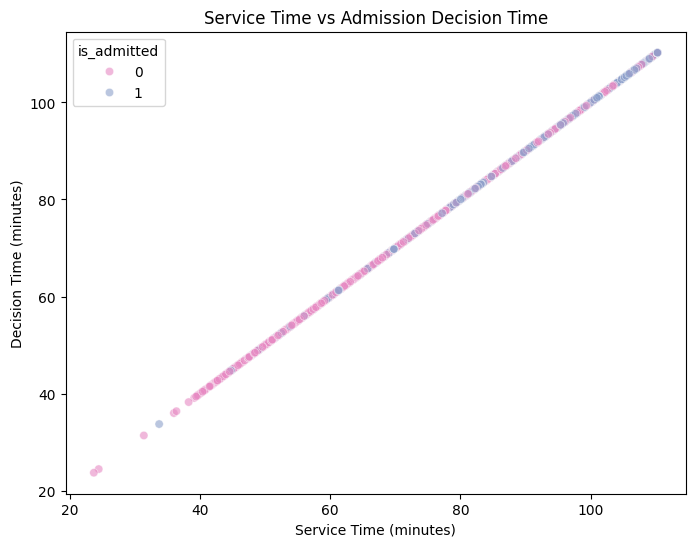

Index(['encounter_id', 'arrival_time', 'triage_level', 'age',
       'mode_of_arrival', 'chief_complaint', 'service_time', 'is_admitted',
       'admission_prob_true', 'congestion_last_60m', 'hour_of_day',
       'day_of_week', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos',
       'is_weekend', 'age_bucket', 'is_ambulance', 'triage_x_age',
       'triage_x_ambulance', 'arrival_dt_floor_min', 'arrivals_this_min',
       'arrivals_last_60m', 'is_busy_period', 'admission_decision_min'],
      dtype='object')


In [ ]:
# 8. Service time vs admission decision time scatter plot
# Calculate admission decision time in minutes using service_time
df['admission_decision_min'] = df['service_time']

plt.figure(figsize=(8,6))
sns.scatterplot(x="service_time", y="admission_decision_min", hue="is_admitted", data=df, alpha=0.6, palette=["#e78ac3","#8da0cb"])
plt.title("Service Time vs Admission Decision Time")
plt.xlabel("Service Time (minutes)")
plt.ylabel("Decision Time (minutes)")
plt.show()

print(df.columns)

**OBSERVATION:**
- Admitted patients generally require longer service and decision times, clustering on the right.
- Quick decisions and short stays are linked with discharges, confirming process flow differences.

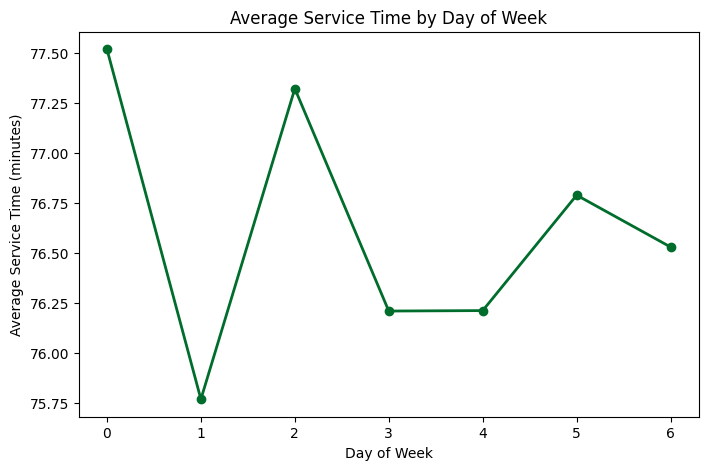

In [ ]:
# 9. Average service time by day line chart
avg_service = df.groupby("day_of_week")["service_time"].mean()
plt.figure(figsize=(8,5))
plt.plot(avg_service.index, avg_service.values, marker="o", color="#006D2C", linewidth=2)
plt.title("Average Service Time by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Service Time (minutes)")
plt.show()

**OBSERVATION:**
- Weekends show slightly elevated average times, suggesting staffing or case complexity factors.
- Weekday variations highlight scheduling optimization opportunities.

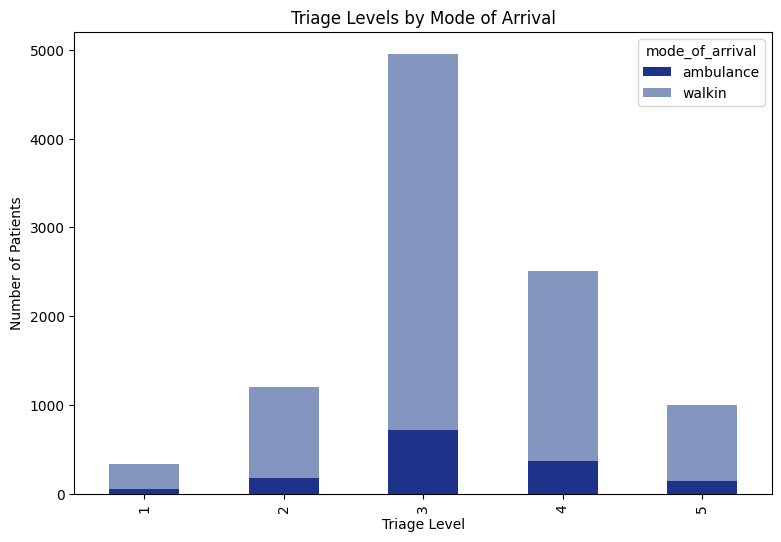

In [ ]:
# 10. Mode of arrival vs triage stacked bar chart
arrival_triage = pd.crosstab(df["triage_level"], df["mode_of_arrival"])
arrival_triage.plot(kind="bar", stacked=True, figsize=(9,6), color=["#1c3389","#8496bf"])
plt.title("Triage Levels by Mode of Arrival")
plt.xlabel("Triage Level")
plt.ylabel("Number of Patients")
plt.show()

**OBSERVATION:**
- Ambulances dominate severe triage levels, while walk-ins dominate lower ones.
- This validates clinical intuition, highlighting how transport mode correlates with acuity.


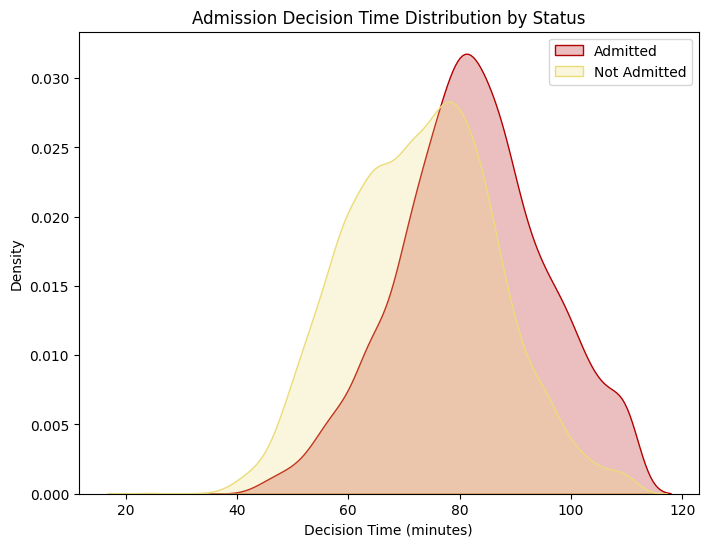

In [ ]:
# 11. Admission decision time KDE plot by admission status
plt.figure(figsize=(8,6))
sns.kdeplot(df[df.is_admitted==1]["admission_decision_min"], label="Admitted", fill=True, color="#b30000")
sns.kdeplot(df[df.is_admitted==0]["admission_decision_min"], label="Not Admitted", fill=True, color="#ebdc78")
plt.title("Admission Decision Time Distribution by Status")
plt.xlabel("Decision Time (minutes)")
plt.legend()
plt.show()

**OBSERVATION:**
- KDE plots reveal admitted patients have longer, more variable decision times.

- Non-admitted patients cluster early, reflecting faster discharge processes.

# **3D Visualizations**

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# 1. Interactive 3D Bubble Chart: Hour of Day vs Day of Week vs Arrivals
arrivals = df.groupby(["day_of_week","hour_of_day"]).size().reset_index(name='count')
fig2 = px.scatter_3d(arrivals, x="hour_of_day", y="day_of_week", z="count",
                    size="count", color="count", color_continuous_scale="Viridis",
                    title="Bubble Chart of Patient Arrivals")
fig2.show()

**OBSERVATIONS:**
- The 3D bubble chart shows patient arrivals by hour and day.
- Arrivals peak in the morning to early afternoon.
- Mondays and Tuesdays have the highest patient traffic.
- Late-night hours see very few arrivals.
- Weekends generally have lower patient counts.

In [ ]:
# 2. Interactive 3D Surface Plot: Triage Level vs Age vs Admission Probability
import numpy as np
from scipy.interpolate import griddata

x = df["triage_level"]
y = df["age"]
z = df["admission_prob_true"]
xi = np.linspace(x.min(), x.max(), 40)
yi = np.linspace(y.min(), y.max(), 40)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), z, (xi, yi), method='linear')

fig3 = go.Figure(data=[go.Surface(z=zi, x=xi, y=yi, colorscale="Viridis")])
fig3.update_layout(scene=dict(
    xaxis_title='Triage Level',
    yaxis_title='Age',
    zaxis_title='Admission Probability'),
    title="Admission Probability by Triage Level & Age")
fig3.show()

**OBSERVATIONS:**

- Higher triage levels (more severe cases) generally correspond to a higher probability of admission.

- Older patients tend to have a slightly higher admission probability across most triage levels.

- Low triage levels show consistently low admission probabilities, regardless of age.

- The surface rises sharply where age and triage level are both high, indicating high-risk patients.

- This plot highlights how severity and age together influence hospital admission likelihood.

In [ ]:
# 3. Interactive 3D Line (Scatter with connected lines): Average Service Time across Day & Hour
service_group = df.groupby(["day_of_week","hour_of_day"])["service_time"].mean().reset_index()
fig4 = go.Figure(data=[go.Scatter3d(
    x=service_group["hour_of_day"],
    y=service_group["day_of_week"],
    z=service_group["service_time"],
    mode="lines+markers",
    line=dict(color="blue", width=3),
    marker=dict(size=5, color=service_group["service_time"], colorscale="Viridis")
)])
fig4.update_layout(scene=dict(
    xaxis_title='Hour of Day',
    yaxis_title='Day of Week',
    zaxis_title='Avg Service Time'),
    title="Average Service Time by Day & Hour")
fig4.show()

**OBSERVATIONS:**

- Service time varies by hour, with some peak periods showing longer times.

- Late mornings to early afternoons often have higher average service times.

- Weekends tend to show shorter service times compared to weekdays.

- Early morning hours generally have the lowest service times.

- The plot indicates that busiest periods correlate with longer service durations.